In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller

In [2]:
# task 1

df = pd.read_csv('DS3_C1_S2_Weather_Data_Practice.csv')
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [3]:
df.set_index(['Date'], inplace = True)

In [4]:
df

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [5]:
lags = 3
moving_average = df.rolling(window = lags).mean()

In [6]:
df_ts = pd.DataFrame({'actual': df.Temp, 'ma': moving_average.Temp})
df_ts

,actual,ma
Date,,
1981-01-01,20.7,NaN
1981-01-02,17.9,NaN
1981-01-03,18.8,19.133333
1981-01-04,14.6,17.100000
1981-01-05,15.8,16.400000
...,...,...
1990-12-27,14.0,13.833333
1990-12-28,13.6,14.066667
1990-12-29,13.5,13.700000


<AxesSubplot:xlabel='Date'>

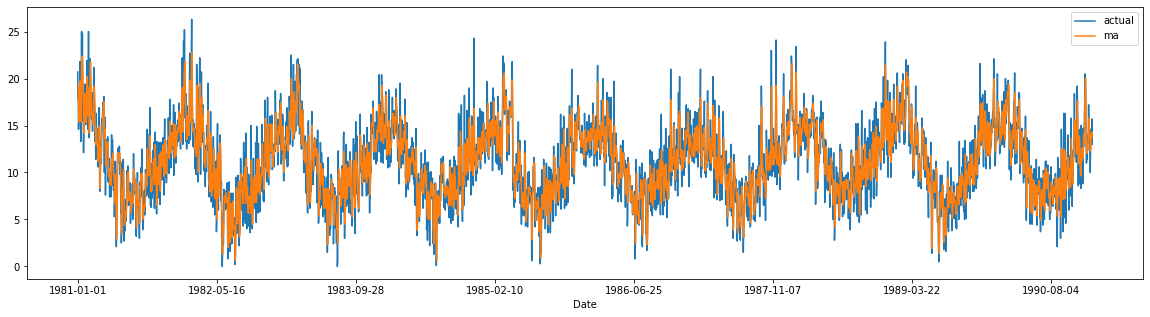

In [7]:
df_ts.plot(figsize=(20, 5))

In [8]:
# task 2

df

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [9]:
# task 2

decomposition = seasonal_decompose(df, period = 365)
d_trend = decomposition.trend
d_seasonal = decomposition.seasonal
d_residual = decomposition.resid

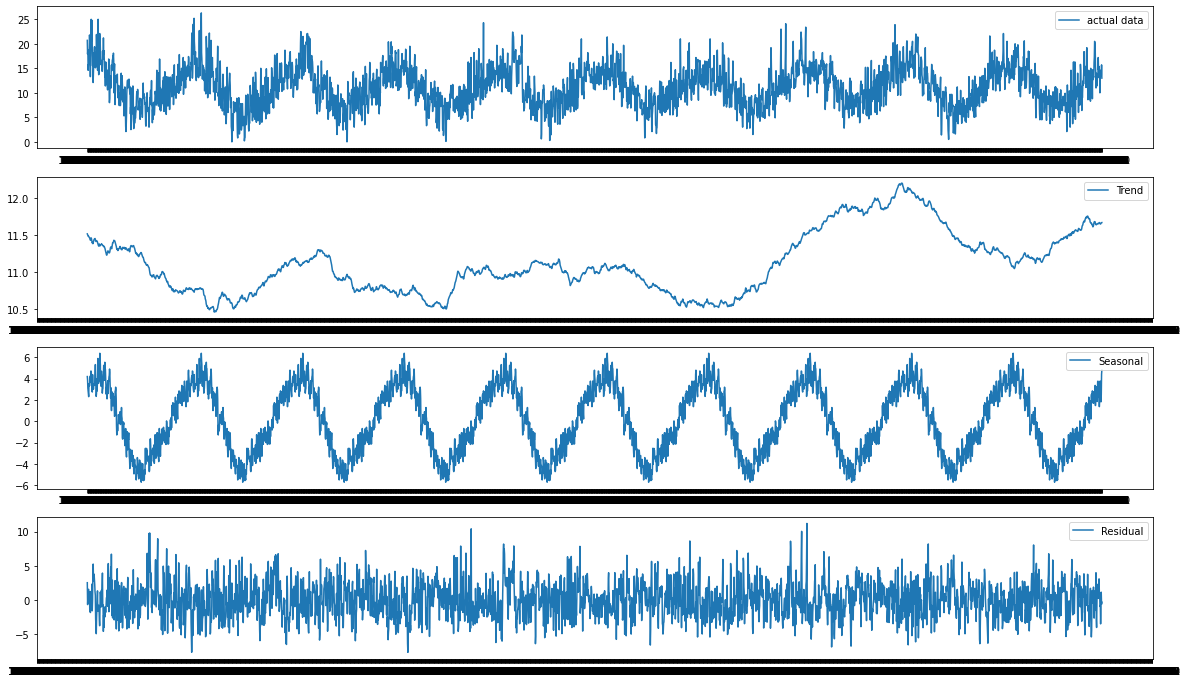

In [10]:
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(df,label='actual data')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

In [11]:
# task 3

def checkstationary(data):
    pvalue = adfuller(df)[1]
    if pvalue < 0.5:
        msg = f'data stationary as pvalue is {pvalue}'
    else:
        msg = f'not stationary as pvalue is {pvalue}'
        
    return msg

print(checkstationary(df))

data stationary as pvalue is 0.000247082630036105


In [12]:
# task 4

#simple

data = df['Temp']
def simplesmooting(data, alpha):
    model = SimpleExpSmoothing(data).fit(smoothing_level=alpha)
    pdct = model.fittedvalues
    
    dff = pd.DataFrame({'actual': data, 'forecast': pdct})
    return model, dff

dff = simplesmooting(data, 0.5)
dff

(<statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x1912b716460>,
             actual   forecast
 Date                         
 1981-01-01    20.7  19.097545
 1981-01-02    17.9  19.898773
 1981-01-03    18.8  18.899386
 1981-01-04    14.6  18.849693
 1981-01-05    15.8  16.724847
 ...            ...        ...
 1990-12-27    14.0  13.498774
 1990-12-28    13.6  13.749387
 1990-12-29    13.5  13.674694
 1990-12-30    15.7  13.587347
 1990-12-31    13.0  14.643673
 
 [3650 rows x 2 columns])

In [13]:
alphas = [0, 0.2, 0.6, 0.8]

d_simple_exp = {}
models = []
for a in alphas:
    m, df = simplesmooting(data, a)
    d_simple_exp[a] = df.forecast
    models.append(m)
for i in range(len(alphas)):
    print(d_simple_exp[alphas[i]])

Date
1981-01-01    11.177755
1981-01-02    11.177755
1981-01-03    11.177755
1981-01-04    11.177755
1981-01-05    11.177755
                ...    
1990-12-27    11.177755
1990-12-28    11.177755
1990-12-29    11.177755
1990-12-30    11.177755
1990-12-31    11.177755
Name: forecast, Length: 3650, dtype: float64
Date
1981-01-01    17.992181
1981-01-02    18.533745
1981-01-03    18.406996
1981-01-04    18.485597
1981-01-05    17.708477
                ...    
1990-12-27    13.448916
1990-12-28    13.559133
1990-12-29    13.567306
1990-12-30    13.553845
1990-12-31    13.983076
Name: forecast, Length: 3650, dtype: float64
Date
1981-01-01    19.490531
1981-01-02    20.216212
1981-01-03    18.826485
1981-01-04    18.810594
1981-01-05    16.284238
                ...    
1990-12-27    13.695645
1990-12-28    13.878258
1990-12-29    13.711303
1990-12-30    13.584521
1990-12-31    14.853809
Name: forecast, Length: 3650, dtype: float64
Date
1981-01-01    20.144358
1981-01-02    20.588872
1981-

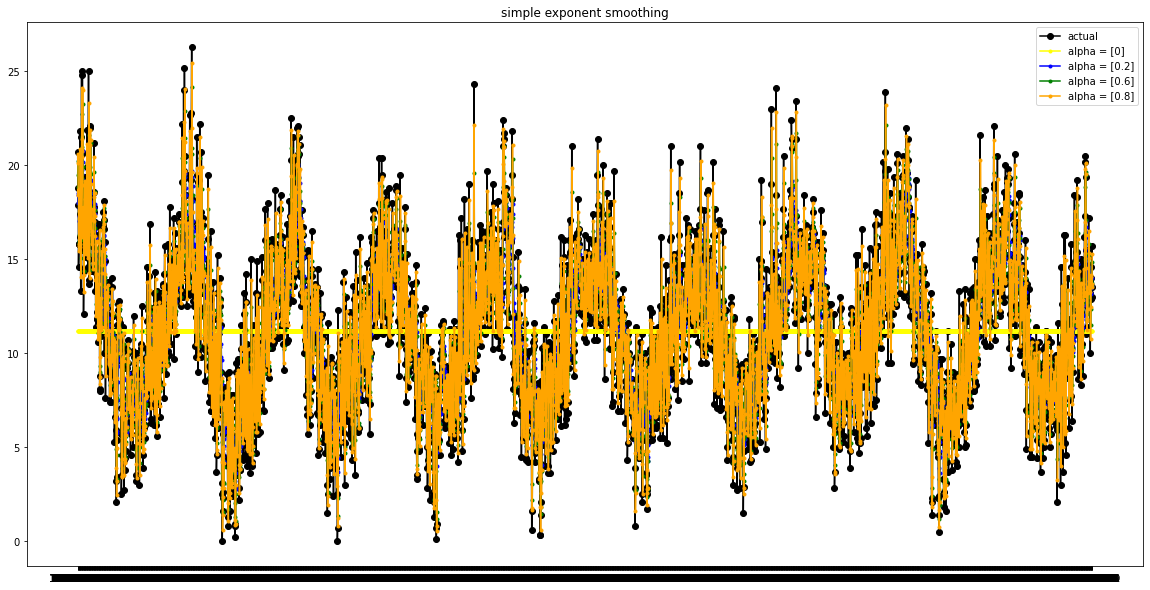

In [14]:
colors = ['yellow', 'blue', 'green', 'orange']

fig,ax = plt.subplots(1, 1, figsize=(20, 10))
plt.plot(data, marker = 'o', color = 'black', label = 'actual')

for i in range(len(alphas)):
    plt.plot(d_simple_exp[alphas[i]], marker = '.', color = colors[i], label = f'alpha = {[alphas[i]]}')
    
    
plt.title('simple exponent smoothing')
plt.legend()

In [15]:
# double exponential smooting

alpha = 0.25
beta = 0.45 # rand vals

model2 = ExponentialSmoothing(data, trend = 'additive').fit(smoothing_level=alpha, smoothing_trend=beta)

f_dexp = model2.fittedvalues
f_dexp

Date
1981-01-01    17.064200
1981-01-02    17.708806
1981-01-03    17.513769
1981-01-04    17.737193
1981-01-05    16.501827
                ...    
1990-12-27    13.031525
1990-12-28    13.099929
1990-12-29    13.107490
1990-12-30    13.132318
1990-12-31    13.989803
Length: 3650, dtype: float64

In [16]:
model2.forecast(12)

3650    13.846564
3651    13.950776
3652    14.054988
3653    14.159200
3654    14.263412
3655    14.367624
3656    14.471836
3657    14.576048
3658    14.680260
3659    14.784472
3660    14.888684
3661    14.992896
dtype: float64

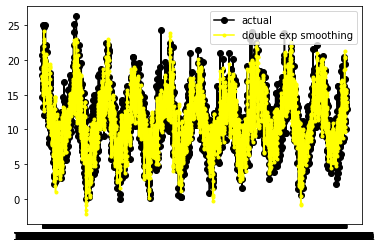

In [17]:
plt.plot(data, marker = 'o', color = 'black', label = 'actual')
plt.plot(f_dexp, marker = '.', color = 'yellow', label = 'double exp smoothing')
plt.legend()

In [18]:
# triple

data = pd.read_csv('DS3_C1_S2_Weather_Data_Practice.csv', index_col = 'Date', parse_dates = ['Date'])
alpha = 0.37
beta = 0.5
gamma = 0.15
model3 = ExponentialSmoothing(data.Temp, trend = 'add', seasonal = 'add',seasonal_periods=365).fit(smoothing_level=alpha, smoothing_trend=beta)
predicted_model3 = model3.fittedvalues
predicted_model3

Date
1981-01-01    19.382921
1981-01-02    18.905783
1981-01-03    17.359513
1981-01-04    16.924881
1981-01-05    15.123887
                ...    
1990-12-27    11.554850
1990-12-28    11.825527
1990-12-29    13.394774
1990-12-30    15.643156
1990-12-31    16.043272
Length: 3650, dtype: float64

In [19]:
model3.forecast(12)

3650    14.385676
3651    13.597110
3652    12.784941
3653    11.912789
3654    11.497570
3655    11.079853
3656    11.939083
3657    11.876867
3658    11.916110
3659    11.949441
3660    11.590596
3661    11.206273
dtype: float64

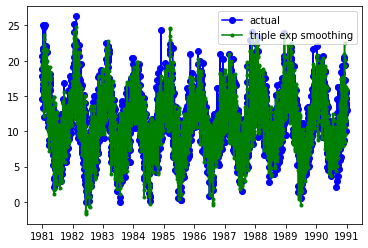

In [20]:
plt.plot(data, marker = 'o', color = 'blue', label = 'actual')
plt.plot(predicted_model3, marker = '.', color = 'green', label = 'triple exp smoothing')
plt.legend()